<a id='top'></a>
## Classifying Customer Conversations via Natural Language Processing

#### An Analysis by Muoyo Okome

<p><img src='https://github.com/muoyo/amazon-reviews/blob/master/images/wordcloud.png?raw=true' align='left'>

<a id='toc'></a>
### Table of Contents
1. [Problem Statement](#problemstatement)
2. [Data Sources](#datasources)
3. [Data Cleaning](#datacleaning)
4. [Classification Analysis](#classification)  
    - [Logistic Regression](#logisticregression)
    - [K Nearest Neighbors](#kneighbors)
    - [Decision Trees](#decisiontrees)
    - [Bagged Trees](#baggedtrees)
    - [Random Forest](#randomforest)
    - [Adaboost](#adaboost)
    - [Gradient Boost](#gradientboost)
    - [Improved Results through Count Vectorization](#countvectorization)
5. [Vizualizations](#visualizations)
6. [Recommendations & Next Steps](#recommendations)

In [2]:
# Import necessary libraries
import spacy
import pickle
import warnings
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.


<a id='problemstatement'></a>
### Problem Statement

If you own or manage a business with any level of success, your customers are frequently having conversations about you and the products you sell. Now what if you had access to automated tools that could monitor these conversations, gage the sentiment of your customers, and then initiate appropriate action as necessary.

This analysis seeks to take a step towards making that reality. The key question we look to answer is whether knowing the text of an Amazon Customer Review can help us predict whether the review is positive (4 or 5 stars) or negative (1 or 2 stars), ignoring the more neutral and less actionable 3-star reviews in the middle.

We then use the best of our predictive models to power a web app that can be deployed to predict the sentiment of not just an Amazon review, but any text from a customer that relates to a particular product.

[Back to Top ↑](#top)

<a id='datasources'></a>
### Data Sources

#### **[AWS Open Data: Amazon Customer Reviews Dataset](https://registry.opendata.aws/amazon:reviews/)**

- Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazon’s iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. Over 130+ million customer reviews are available to researchers as part of this dataset.

- A collection of reviews written in the Amazon.com marketplace and associated metadata from 1995 until 2015. This is intended to facilitate study into the properties (and the evolution) of customer reviews potentially including how people evaluate and express their experiences with respect to products at scale. (130M+ customer reviews) 

<br> 

[Back to Top ↑](#top)

In [3]:
# Import python files we've created to help
%run ../python_files/nlp
%run ../python_files/data_cleaning
%run ../python_files/classification
%run ../python_files/visualizations

In [4]:
# Read in original data
df_full = pd.read_csv('https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz', sep='\t', error_bad_lines=False, warn_bad_lines=False)

In [22]:
# dfs = {}

In [15]:
# cat_list = [
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Wireless_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_Games_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_DVD_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Toys_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Tools_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Sports_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Software_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Shoes_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Pet_Products_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_PC_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Outdoors_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Office_Products_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Musical_Instruments_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Music_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Apps_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Major_Appliances_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Luggage_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Lawn_and_Garden_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Kitchen_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Jewelry_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_Improvement_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_Entertainment_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Health_Personal_Care_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Grocery_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Furniture_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Games_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Download_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Ebook_Purchase_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Camera_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_02.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_01.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Beauty_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Baby_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Automotive_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Apparel_v1_00.tsv.gz'
# ]


# for cat_link in cat_list:
#     dfs[cat_link] = pd.read_csv(cat_link, sep='\t', error_bad_lines=False, warn_bad_lines=True)
#     print(cat_link, dfs[cat_link].shape)

In [16]:
# for cat_link in dfs:
#     print(cat_link)
#     dfs[cat_link] = dfs[cat_link][dfs[cat_link].star_rating != 3]
#     dfs[cat_link]['review_class'] = ((dfs[cat_link]['star_rating'] == 4) | (dfs[cat_link]['star_rating'] == 5)).astype(int)
#     dfs[cat_link] = clean_data(dfs[cat_link])
#     dfs[cat_link] = append_sentiment_scores(dfs[cat_link])
#     print(dfs[cat_link].head())

In [17]:
# display(len(dfs['https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Pet_Products_v1_00.tsv.gz']))

In [18]:
# dfs.keys()

<a id='datacleaning'></a>
### Data Cleaning

In preparation for our analysis, in addition to dealing with missing values and limiting our scope to the columns of interest, we also used [VADER Sentiment Analysis](https://github.com/cjhutto/vaderSentiment) (Valence Aware Dictionary and sEntiment Reasoner) to give us positive, negative, neutral, and compound sentiment scores for each review in our dataset.

To make the project more modular and easier to follow & build upon, we created separate .py files to handle the heavy lifting for tasks such as data extraction & cleaning, visualizations, and natural language processing.

We chose to focus on the Watches category (~960,000 customer reviews) for this analysis, though with sufficient time, the process can be generalized to all 130 million rows of the dataset.

In [ ]:
# Clean data & load into final dataframe

In [13]:
df_full = df_full[df_full.star_rating != 3]
df_full['review_class'] = ((df_full['star_rating'] == 4) | (df_full['star_rating'] == 5)).astype(int)

In [29]:
df = clean_data(df_full)

In [40]:
# df_full.customer_id.value_counts()

In [41]:
# df_full.loc[df_full.customer_id == 40765068]

In [42]:
# df_full.loc[df_full.customer_id == 42418272]

In [29]:
# df = append_sentiment_scores(df)

In [ ]:
df = append_sentiment_scores2(df)

In [4]:
# pickle.dump( df, open( "../models/save.df", "wb" ) )
df = pickle.load( open( "../models/save.df", "rb" ))

In [5]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,verified_purchase,review_headline,review_body,review_date,review_class,review_fulltext,neg,neu,pos,compound
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,...,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31,1,Five Stars. Absolutely love this watch! Get co...,0.000,0.616,0.384,0.8169
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,...,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31,1,I love thiswatch it keeps time wonderfully. I ...,0.000,0.357,0.643,0.9531
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,...,Y,Two Stars,Scratches,2015-08-31,0,Two Stars. Scratches,0.000,1.000,0.000,0.0000
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,...,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31,1,"Five Stars. It works well on me. However, I fo...",0.000,0.890,0.110,0.2732
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,...,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31,1,"Beautiful face, but cheap sounding links. Beau...",0.024,0.715,0.261,0.9886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960199,US,39508379,REH8UQZAXQS40,B00005OT9I,2153632,Xhilaration&#174; Silver Dial Bangle Watch,Watches,2,17,17,...,N,Great prize - but size??,It's a great watch - but you don't have a chan...,2001-12-13,0,Great prize - but size??. It's a great watch -...,0.152,0.508,0.340,0.7867
960200,US,44704251,RJ14QPZEOI9P8,B00005QEM6,903687397,Armitron Men's Titanium 3 Eye Sport Analog Chr...,Watches,5,9,10,...,N,A very classy watch!,"Well worth the price. This is a light weight, ...",2001-11-08,1,A very classy watch!. Well worth the price. Th...,0.000,0.618,0.382,0.9766
960201,US,40571775,R2B1G5650WWFCE,B00005QEME,252821780,Men's Timex Internet Messenger Sport Watch,Watches,5,3,16,...,N,This is a great watch,"Dear Targeteers,<BR>This watch is exelent. it ...",2001-11-06,1,"This is a great watch. Dear Targeteers,<BR>Thi...",0.000,0.746,0.254,0.8979
960202,US,44474855,R2MMGPUWXXOFI2,B00004YK0H,118389241,Energizer 393 Button Cell Battery,Watches,4,0,0,...,N,Now watt a minute here.,"In the old days, the common hearing battery in...",2001-04-05,1,"Now watt a minute here.. In the old days, the ...",0.020,0.905,0.075,0.6402




[Back to Top ↑](#top)

<a id='classification'></a>
### Classification Analysis

With the help of the scikit-learn package, our next step was to run a series of classification models, each time with the goal of using insight gained from the review text, to predict the number of stars in the review's star rating.

- **Dependent variable:** **star_rating:** The 1-5 star rating of the review. <p>

- **Independendent variables:**
    - **review_fulltext** serves as the underlying data for all of our independent variables.<br>
    It is made up of the **review_title** and **review_body** appended together.
    
    From the **review_fulltext** we calculated 4 sentiment scores which we used as our variables.
        - **neg:** Review's 'negative' rating via VADER Sentiment Analysis.
        - **neu:** Review's 'neutral' rating via VADER Sentiment Analysis.
        - **pos:** Review's 'positive' rating via VADER Sentiment Analysis.
        - **compound:** Review's 'compound' rating via VADER Sentiment Analysis.

To guard against data leakage, we split our dataset into training data and test data.

In [48]:
df.shape

(881088, 21)

In [49]:
X_train, X_test, y_train, y_test = get_train_test_split(df, test_size=.25)

Looking at our data, it's clear that the classes present are not naturally balanced, which one might expect.

In [50]:
y_train.value_counts()

1    558153
0    102663
Name: review_class, dtype: int64

In [35]:
# X_train.review_fulltext.map(wordcount).mean()

We leveraged SMOTE to deal with this unbalanced class issue.

In [52]:
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

In [55]:
rus = RandomUnderSampler()

X_train_resampled, y_train_resampled = rus.fit_resample(X_train_numeric, y_train)

In [56]:
y_train_resampled.value_counts()

1    102663
0    102663
Name: review_class, dtype: int64

With newly balanced classes for our analysis, we ran a series of classification models against our data with varying results. For each model, we display a classification report and confusion matrix for training and test sets to quickly understand the 

Our Decision Trees and K Nearest Neighbors were the models best at explaining our training data. However, performance against our test data showed that in most cases our models still had significant room for improvement, with overfitting often being the culprit (for some random samples overfitting was much less of an issue, but it did often occur). Going forward this is something we will look to improve our models by addressing this problem.



[Back to Top ↑](#top)

<a id='logisticregression'></a>
### Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.83      0.84    103041
           1       0.83      0.85      0.84    103041

    accuracy                           0.84    206082
   macro avg       0.84      0.84      0.84    206082
weighted avg       0.84      0.84      0.84    206082



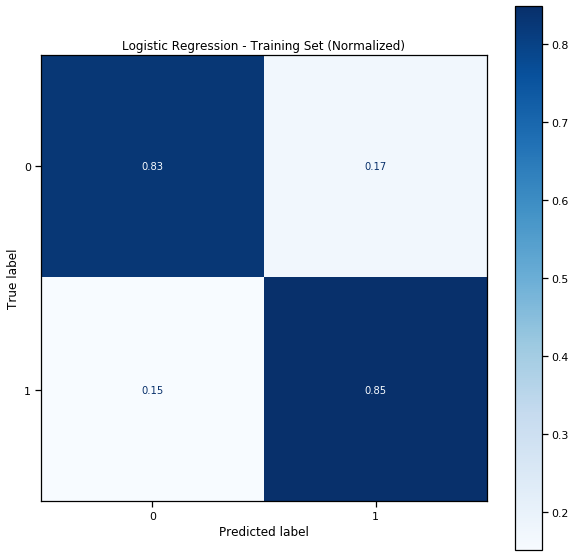

In [39]:
clf_lr = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear', penalty='l2')
clf_lr.fit(X_train_resampled, y_train_resampled)

y_hat_lr_train = clf_lr.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_lr_train))
show_confusion_matrix(clf_lr, X_train_resampled, y_train_resampled, title='Logistic Regression - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.50      0.82      0.62     34093
           1       0.96      0.85      0.90    186179

    accuracy                           0.85    220272
   macro avg       0.73      0.84      0.76    220272
weighted avg       0.89      0.85      0.86    220272



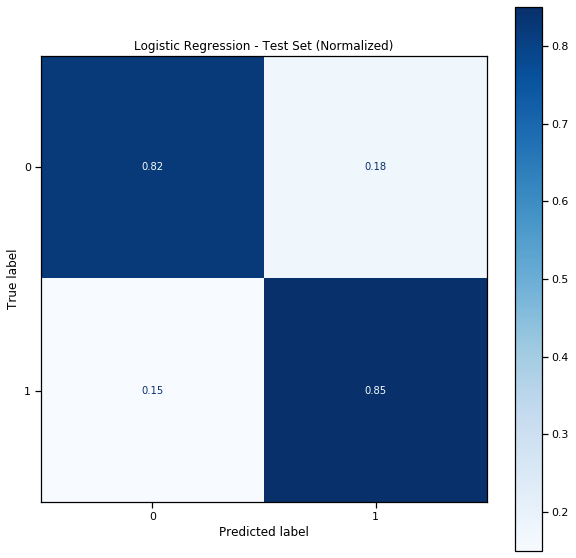

In [40]:
y_hat_lr_test = clf_lr.predict(X_test_numeric)
print(classification_report(y_test, y_hat_lr_test))
show_confusion_matrix(clf_lr, X_test_numeric, y_test, title='Logistic Regression - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='naivebayes'></a>
### Naive Bayes

              precision    recall  f1-score   support

           0       0.86      0.79      0.82    103041
           1       0.81      0.87      0.84    103041

    accuracy                           0.83    206082
   macro avg       0.83      0.83      0.83    206082
weighted avg       0.83      0.83      0.83    206082



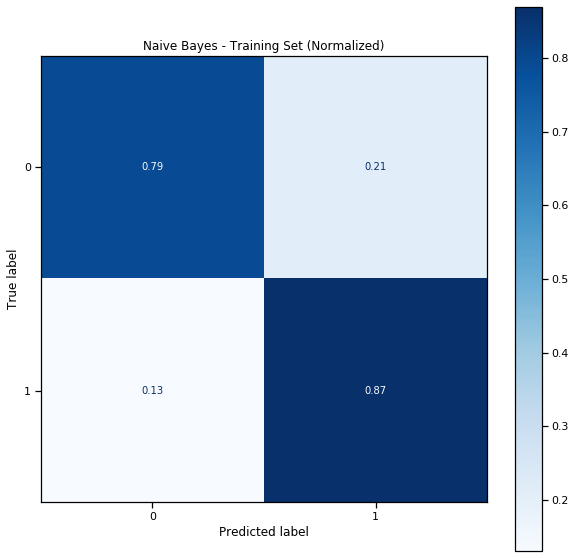

In [41]:
clf_nb = GaussianNB()
clf_nb.fit(X_train_resampled, y_train_resampled)

y_hat_nb_train = clf_nb.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_nb_train))
show_confusion_matrix(clf_nb, X_train_resampled, y_train_resampled, title='Naive Bayes - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.53      0.79      0.63     34093
           1       0.96      0.87      0.91    186179

    accuracy                           0.86    220272
   macro avg       0.74      0.83      0.77    220272
weighted avg       0.89      0.86      0.87    220272



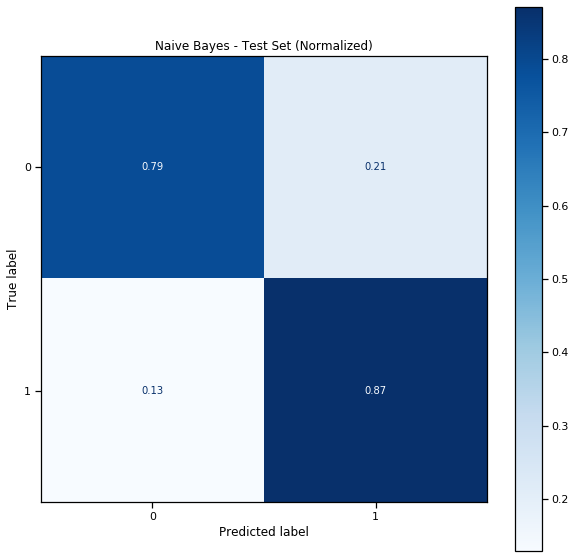

In [42]:
y_hat_nb_test = clf_nb.predict(X_test_numeric)
print(classification_report(y_test, y_hat_nb_test))
show_confusion_matrix(clf_nb, X_test_numeric, y_test, title='Naive Bayes - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='kneighbors'></a>
### K Nearest Neighbors

              precision    recall  f1-score   support

           0       0.85      0.89      0.87    103041
           1       0.88      0.84      0.86    103041

    accuracy                           0.87    206082
   macro avg       0.87      0.87      0.87    206082
weighted avg       0.87      0.87      0.87    206082



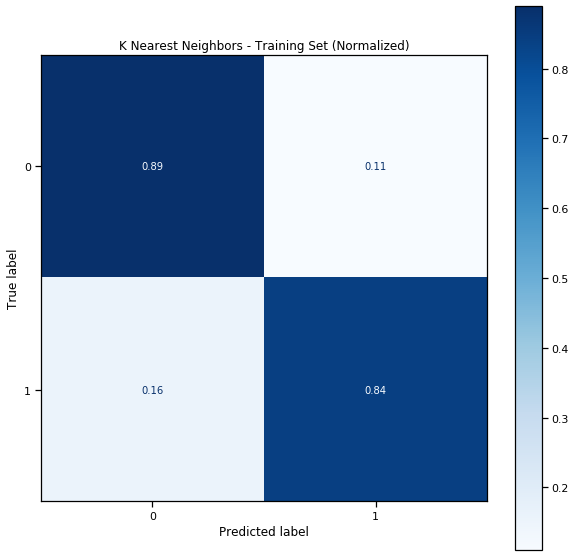

In [43]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_resampled, y_train_resampled)

y_hat_knn_train = clf_knn.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_knn_train))
show_confusion_matrix(clf_knn, X_train_resampled, y_train_resampled, title='K Nearest Neighbors - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.44      0.85      0.58     34093
           1       0.97      0.80      0.88    186179

    accuracy                           0.81    220272
   macro avg       0.70      0.83      0.73    220272
weighted avg       0.89      0.81      0.83    220272



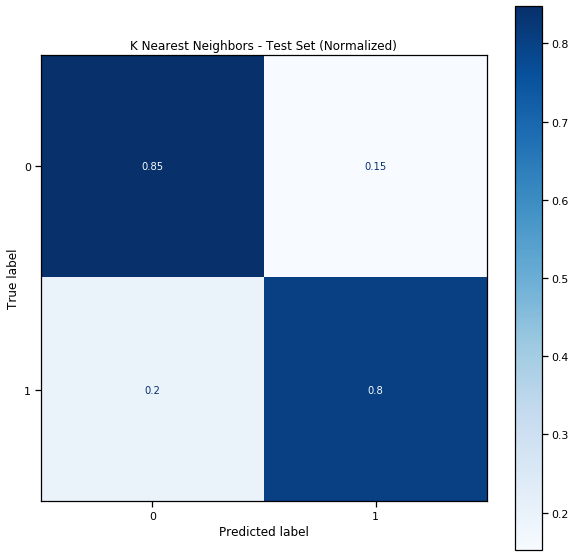

In [44]:
y_hat_knn_test = clf_knn.predict(X_test_numeric)
print(classification_report(y_test, y_hat_knn_test))
show_confusion_matrix(clf_knn, X_test_numeric, y_test, title='K Nearest Neighbors - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='#decisiontrees'></a>
### Decision Trees

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    103041
           1       0.98      0.94      0.96    103041

    accuracy                           0.96    206082
   macro avg       0.96      0.96      0.96    206082
weighted avg       0.96      0.96      0.96    206082



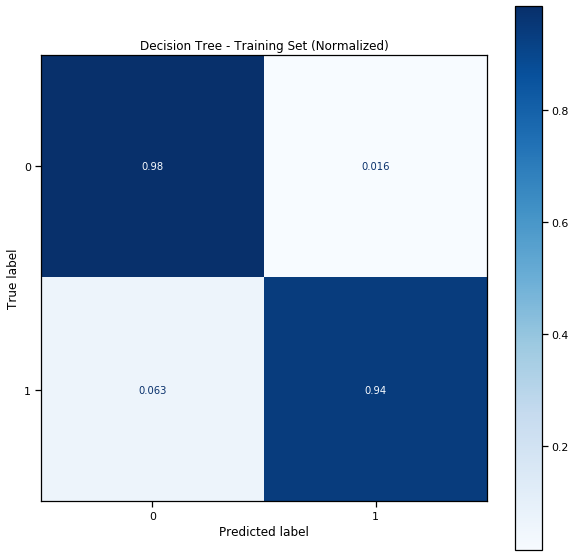

In [45]:
clf_dt = DecisionTreeClassifier(criterion='entropy')
clf_dt.fit(X_train_resampled, y_train_resampled)

y_hat_dt_train = clf_dt.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_dt_train))
show_confusion_matrix(clf_dt, X_train_resampled, y_train_resampled, title='Decision Tree - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.40      0.81      0.53     34093
           1       0.96      0.77      0.86    186179

    accuracy                           0.78    220272
   macro avg       0.68      0.79      0.69    220272
weighted avg       0.87      0.78      0.80    220272



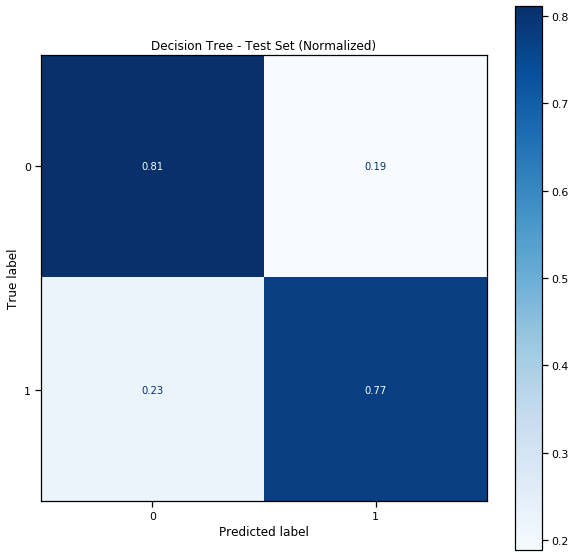

In [46]:
y_hat_dt_test = clf_dt.predict(X_test_numeric)
print(classification_report(y_test, y_hat_dt_test))
show_confusion_matrix(clf_dt, X_test_numeric, y_test, title='Decision Tree - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='#baggedtrees'></a>
### Bagged Trees

              precision    recall  f1-score   support

           0       0.83      0.87      0.85    103041
           1       0.87      0.82      0.84    103041

    accuracy                           0.84    206082
   macro avg       0.85      0.84      0.84    206082
weighted avg       0.85      0.84      0.84    206082



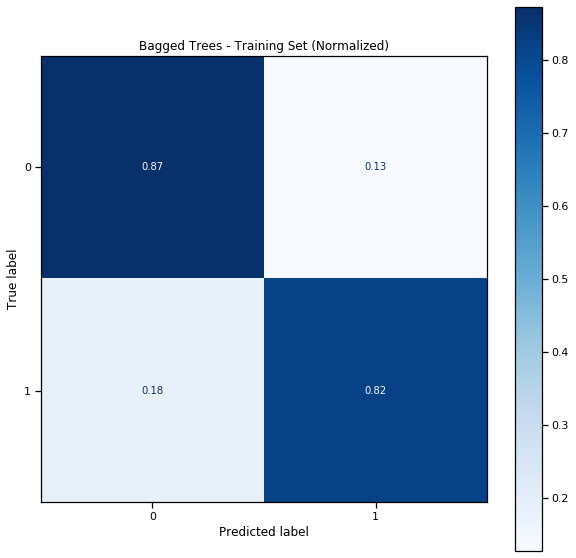

In [47]:
clf_bagged = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_leaf_nodes=100), 
                                 n_estimators=20)
clf_bagged.fit(X_train_resampled, y_train_resampled)

y_hat_bagged_train = clf_bagged.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_bagged_train))
show_confusion_matrix(clf_bagged, X_train_resampled, y_train_resampled, title='Bagged Trees - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.46      0.87      0.60     34093
           1       0.97      0.82      0.89    186179

    accuracy                           0.82    220272
   macro avg       0.72      0.84      0.75    220272
weighted avg       0.89      0.82      0.84    220272



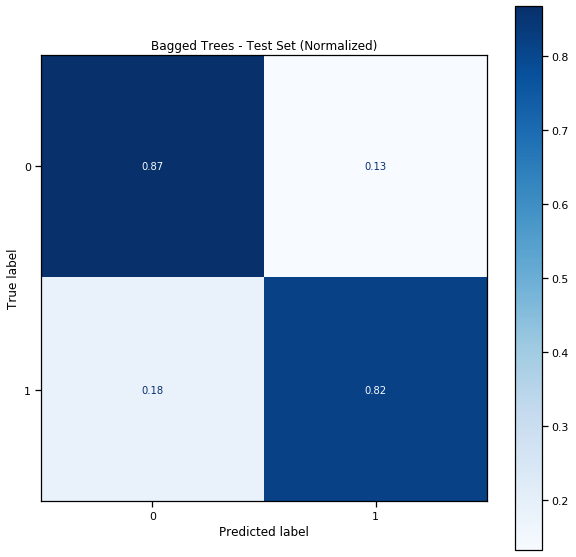

In [48]:
y_hat_bagged_test = clf_bagged.predict(X_test_numeric)
print(classification_report(y_test, y_hat_bagged_test))
show_confusion_matrix(clf_bagged, X_test_numeric, y_test, title='Bagged Trees - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='randomforest'></a>
### Random Forest

              precision    recall  f1-score   support

           0       0.86      0.91      0.89    103041
           1       0.90      0.85      0.88    103041

    accuracy                           0.88    206082
   macro avg       0.88      0.88      0.88    206082
weighted avg       0.88      0.88      0.88    206082



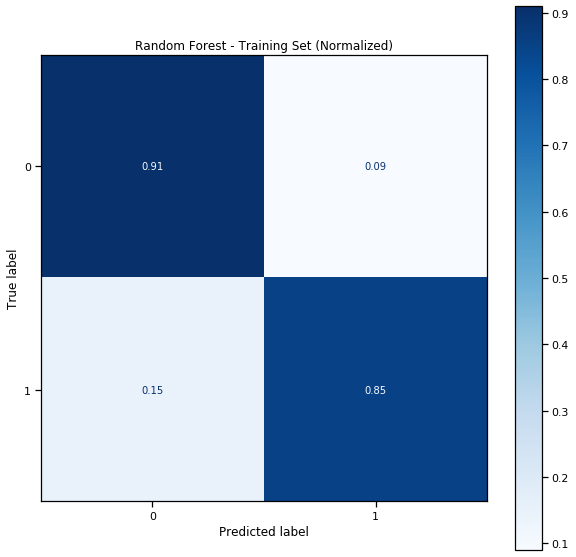

In [49]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth = 15)
clf_forest.fit(X_train_resampled, y_train_resampled)

y_hat_forest_train = clf_forest.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_forest_train))
show_confusion_matrix(clf_forest, X_train_resampled, y_train_resampled, title='Random Forest - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.46      0.87      0.60     34093
           1       0.97      0.81      0.89    186179

    accuracy                           0.82    220272
   macro avg       0.72      0.84      0.74    220272
weighted avg       0.89      0.82      0.84    220272



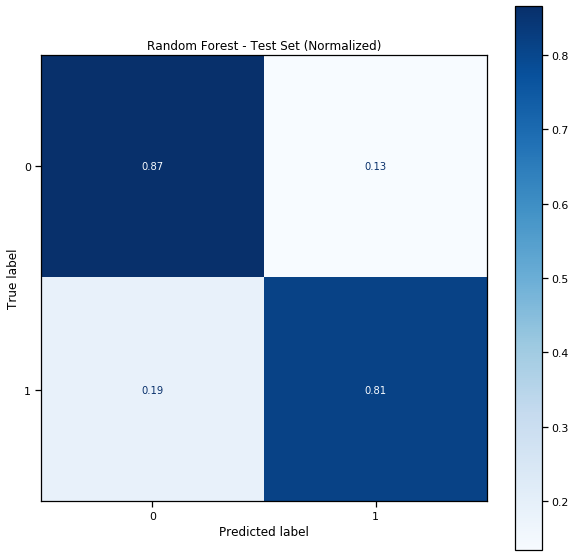

In [50]:
y_hat_forest_test = clf_forest.predict(X_test_numeric)
print(classification_report(y_test, y_hat_forest_test))
show_confusion_matrix(clf_forest, X_test_numeric, y_test, title='Random Forest - Test Set (Normalized)');

In [51]:
pickle.dump( clf_forest, open( "../models/save.forest", "wb" ) )



[Back to Top ↑](#top)

<a id='adaboost'></a>
### Adaboost

              precision    recall  f1-score   support

           0       0.83      0.85      0.84    103041
           1       0.85      0.83      0.84    103041

    accuracy                           0.84    206082
   macro avg       0.84      0.84      0.84    206082
weighted avg       0.84      0.84      0.84    206082



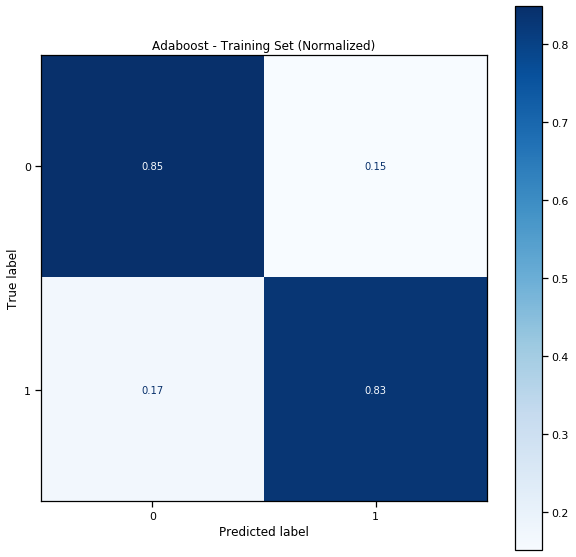

In [52]:
clf_ab = AdaBoostClassifier()
clf_ab.fit(X_train_resampled, y_train_resampled)

y_hat_ab_train = clf_ab.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_ab_train))
show_confusion_matrix(clf_ab, X_train_resampled, y_train_resampled, title='Adaboost - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.48      0.84      0.61     34093
           1       0.97      0.83      0.89    186179

    accuracy                           0.83    220272
   macro avg       0.72      0.84      0.75    220272
weighted avg       0.89      0.83      0.85    220272



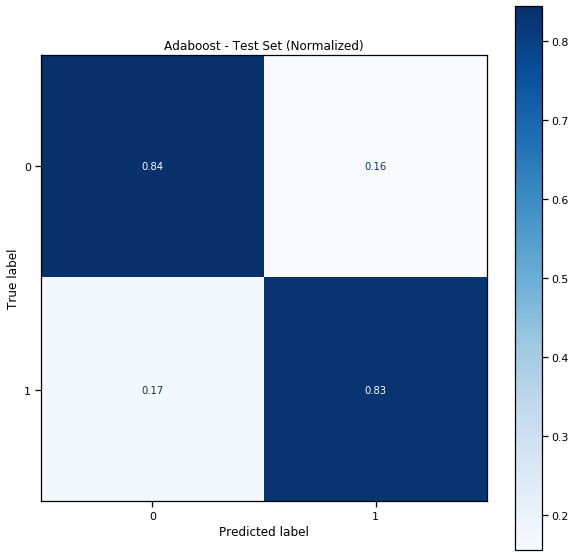

In [53]:
y_hat_ab_test = clf_ab.predict(X_test_numeric)
print(classification_report(y_test, y_hat_ab_test))
show_confusion_matrix(clf_ab, X_test_numeric, y_test, title='Adaboost - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='gradientboost'></a>
### Gradient Boost

              precision    recall  f1-score   support

           0       0.83      0.87      0.85    103041
           1       0.86      0.82      0.84    103041

    accuracy                           0.84    206082
   macro avg       0.84      0.84      0.84    206082
weighted avg       0.84      0.84      0.84    206082



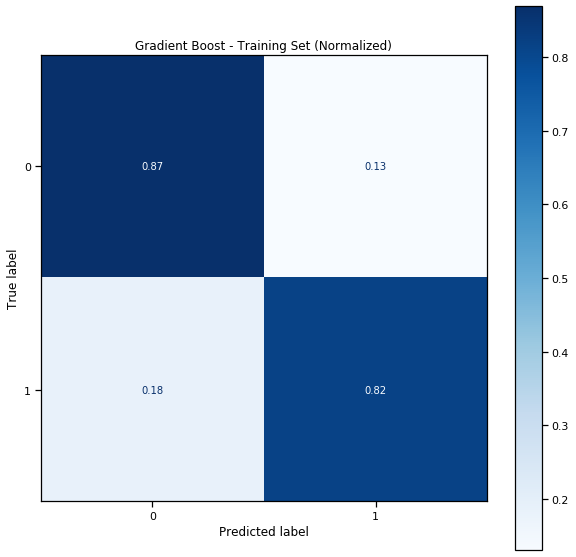

In [54]:
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train_resampled, y_train_resampled)

y_hat_gb_train = clf_gb.predict(X_train_resampled)

print(classification_report(y_train_resampled, y_hat_gb_train))
show_confusion_matrix(clf_gb, X_train_resampled, y_train_resampled, title='Gradient Boost - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.46      0.86      0.60     34093
           1       0.97      0.82      0.89    186179

    accuracy                           0.82    220272
   macro avg       0.72      0.84      0.75    220272
weighted avg       0.89      0.82      0.84    220272



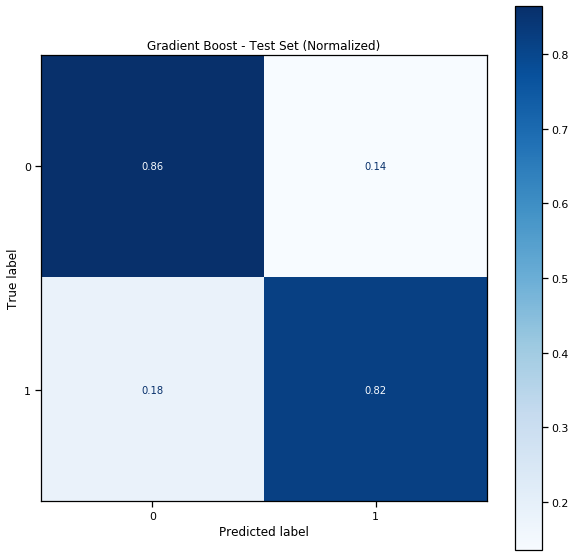

In [55]:
y_hat_gb_test = clf_gb.predict(X_test_numeric)
print(classification_report(y_test, y_hat_gb_test))
show_confusion_matrix(clf_gb, X_test_numeric, y_test, title='Gradient Boost - Test Set (Normalized)');



[Back to Top ↑](#top)

In [6]:
# !python -m spacy download en_core_web_md

In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [10]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import en_core_web_sm
import en_core_web_md


# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = en_core_web_sm.load()
nlp_md = en_core_web_md.load()
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [11]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [12]:
cleaner = predictors()
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [46]:
X_spacy = df['review_fulltext'] # the features we want to analyze
y_spacy = df['review_class'] # the labels, or answers, we want to test against

X_train_spacy, X_test_spacy, y_train_spacy, y_test_spacy = train_test_split(X_spacy, y_spacy, test_size=0.3)
X_train_spacy = cleaner.transform(X_train_spacy)
X_test_spacy = cleaner.transform(X_test_spacy)
X_train_spacy = bow_vector.fit_transform(X_train_spacy, y_train_spacy)
X_test_spacy = bow_vector.transform(X_test_spacy)

rus_spacy = RandomUnderSampler()
X_train_spacy, y_train_spacy = rus_spacy.fit_resample(X_train_spacy, y_train_spacy)

<a id='logisticregression'></a>
### Logistic Regression

In [ ]:
clf_lr_spacy = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear', penalty='l2')
clf_lr_spacy.fit(X_train_spacy, y_train_spacy)

pred_lr_train_spacy = clf_lr_spacy.predict(X_train_spacy)
print(classification_report(y_train_spacy, pred_lr_train_spacy))
show_confusion_matrix(clf_lr_spacy, X_train_spacy, y_train_spacy, title='Logistic Regression via spaCy Vectorization - Training Set (Normalized)');

In [ ]:
pred_lr_test_spacy = clf_lr_spacy.predict(X_test_spacy)
print(classification_report(y_test_spacy, pred_lr_test_spacy))
show_confusion_matrix(clf_lr_spacy, X_test_spacy, y_test_spacy, title='Logistic Regression - Test Set (Normalized)');

In [76]:
pickle.dump( clf_lr_spacy, open( "../models/save.lr_spacy", "wb" ) )

<a id='naivebayes'></a>
### Naive Bayes

In [60]:
# clf_nb_spacy = GaussianNB()
# clf_nb_spacy.fit(X_train_spacy.toarray(), y_train_spacy)

# pred_nb_train_spacy = clf_nb_spacy.predict(X_train_spacy.toarray())
# print(classification_report(y_train_spacy, pred_nb_train_spacy))
# show_confusion_matrix(clf_nb_spacy, X_train_spacy.toarray(), y_train_spacy, title='Naive Bayes - Training Set (Normalized)');

In [61]:
# pred_nb_test_spacy = clf_nb_spacy.predict(X_test_spacy.toarray())
# print(classification_report(y_test_spacy, pred_nb_test_spacy))
# show_confusion_matrix(clf_nb_spacy, X_test_spacy.toarray(), y_test_spacy, title='Naive Bayes - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='kneighbors'></a>
### K Nearest Neighbors

In [63]:
# clf_knn_spacy = KNeighborsClassifier()
# clf_knn_spacy.fit(X_train_spacy, y_train_spacy)

# pred_knn_train_spacy = clf_knn_spacy.predict(X_train_spacy)
# print(classification_report(y_train_spacy, pred_knn_train_spacy))
# show_confusion_matrix(clf_knn_spacy, X_train_spacy, y_train_spacy, title='K Nearest Neighbors - Training Set (Normalized)');

In [64]:
# pred_knn_test_spacy = clf_knn_spacy.predict(X_test_spacy)
# print(classification_report(y_test_spacy, pred_knn_test_spacy))
# show_confusion_matrix(clf_knn_spacy, X_test_spacy, y_test_spacy, title='K Nearest Neighbors - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='#decisiontrees'></a>
### Decision Trees

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     95776
           1       0.99      1.00      1.00     95776

    accuracy                           1.00    191552
   macro avg       1.00      1.00      1.00    191552
weighted avg       1.00      1.00      1.00    191552



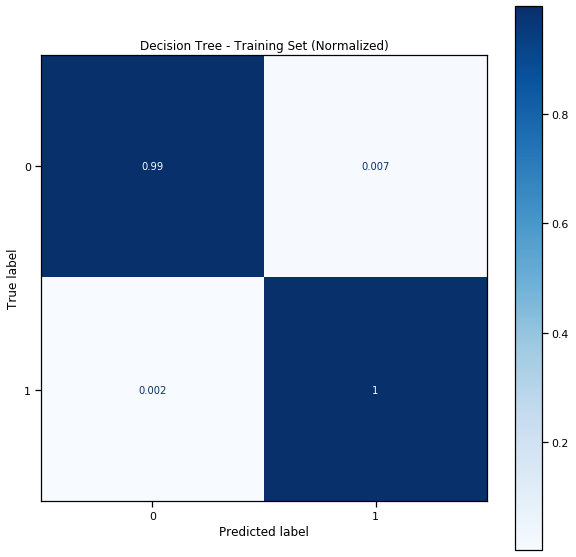

In [91]:
clf_dt_spacy = DecisionTreeClassifier(criterion='entropy')
clf_dt_spacy.fit(X_train_spacy, y_train_spacy)

pred_dt_train_spacy = clf_dt_spacy.predict(X_train_spacy)
print(classification_report(y_train_spacy, pred_dt_train_spacy))
show_confusion_matrix(clf_dt_spacy, X_train_spacy, y_train_spacy, title='Decision Tree - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.50      0.83      0.62     41358
           1       0.96      0.84      0.90    222969

    accuracy                           0.84    264327
   macro avg       0.73      0.84      0.76    264327
weighted avg       0.89      0.84      0.86    264327



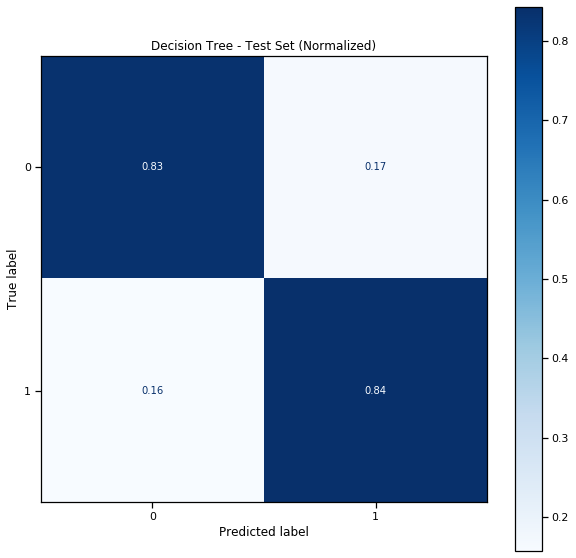

In [92]:
pred_dt_test_spacy = clf_dt_spacy.predict(X_test_spacy)
print(classification_report(y_test_spacy, pred_dt_test_spacy))
show_confusion_matrix(clf_dt_spacy, X_test_spacy, y_test_spacy, title='Decision Tree - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='#baggedtrees'></a>
### Bagged Trees

In [67]:
# clf_bagged_spacy = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_leaf_nodes=100), 
#                                  n_estimators=20)
# clf_bagged_spacy.fit(X_train_spacy, y_train_spacy)

# pred_bagged_train_spacy = clf_bagged_spacy.predict(X_train_spacy)
# print(classification_report(y_train_spacy, pred_bagged_train_spacy))
# show_confusion_matrix(clf_bagged_spacy, X_train_spacy, y_train_spacy, title='Bagged Trees - Training Set (Normalized)');

In [68]:
# pred_bagged_test_spacy = clf_bagged_spacy.predict(X_test_spacy)
# print(classification_report(y_test_spacy, pred_bagged_test_spacy))
# show_confusion_matrix(clf_bagged_spacy, X_test_spacy, y_test_spacy, title='Bagged Trees - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='randomforest'></a>
### Random Forest

              precision    recall  f1-score   support

           0       0.89      0.82      0.85     95776
           1       0.83      0.90      0.86     95776

    accuracy                           0.86    191552
   macro avg       0.86      0.86      0.86    191552
weighted avg       0.86      0.86      0.86    191552



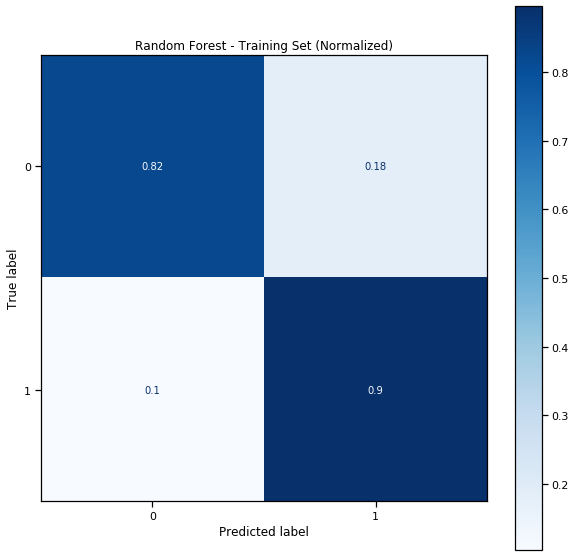

In [93]:
clf_forest_spacy = RandomForestClassifier(n_estimators=100, max_depth = 15)
clf_forest_spacy.fit(X_train_spacy, y_train_spacy)

pred_forest_train_spacy = clf_forest_spacy.predict(X_train_spacy)
print(classification_report(y_train_spacy, pred_forest_train_spacy))
show_confusion_matrix(clf_forest_spacy, X_train_spacy, y_train_spacy, title='Random Forest - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.56      0.81      0.66     41358
           1       0.96      0.88      0.92    222969

    accuracy                           0.87    264327
   macro avg       0.76      0.85      0.79    264327
weighted avg       0.90      0.87      0.88    264327



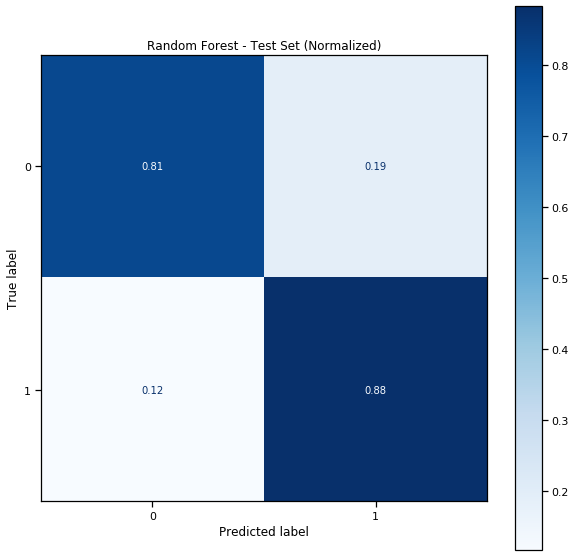

In [94]:
pred_forest_test_spacy = clf_forest_spacy.predict(X_test_spacy)
print(classification_report(y_test_spacy, pred_forest_test_spacy))
show_confusion_matrix(clf_forest_spacy, X_test_spacy, y_test_spacy, title='Random Forest - Test Set (Normalized)');

In [71]:
pickle.dump( clf_forest_spacy, open( "../models/save.forest_spacy", "wb" ) )



[Back to Top ↑](#top)

<a id='adaboost'></a>
### Adaboost

In [96]:
clf_ab_spacy = AdaBoostClassifier()
clf_ab_spacy.fit(X_train_spacy, y_train_spacy)

pred_ab_train_spacy = clf_ab_spacy.predict(X_train_spacy)
print(classification_report(y_train_spacy, pred_ab_train_spacy))
show_confusion_matrix(clf_ab_spacy, X_train_spacy, y_train_spacy, title='Adaboost - Training Set (Normalized)');

In [ ]:
pred_ab_test_spacy = clf_ab_spacy.predict(X_test_spacy)
print(classification_report(y_test_spacy, pred_ab_test_spacy))
show_confusion_matrix(clf_ab_spacy, X_test_spacy, y_test_spacy, title='Adaboost - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='gradientboost'></a>
### Gradient Boost

In [ ]:
clf_gb_spacy = GradientBoostingClassifier()
clf_gb_spacy.fit(X_train_spacy, y_train_spacy)

pred_gb_train_spacy = clf_gb_spacy.predict(X_train_spacy)

print(classification_report(y_train_spacy, pred_gb_train_spacy))
show_confusion_matrix(clf_gb_spacy, X_train_spacy, y_train_spacy, title='Gradient Boost - Training Set (Normalized)');

In [ ]:
pred_gb_test_spacy = clf_gb_spacy.predict(X_test_spacy)
print(classification_report(y_test_spacy, pred_gb_test_spacy))
show_confusion_matrix(clf_gb_spacy, X_test_spacy, y_test_spacy, title='Gradient Boost - Test Set (Normalized)');

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/megarock/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
import numpy as np
from nltk.corpus import stopwords

nlp_md = en_core_web_md.load()
vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'), 
                             lowercase=True, min_df=3, max_df=0.9, max_features=5000)

df_lstm = df.sample(n=15000)

X_lstm = df_lstm['review_fulltext'] # the features we want to analyze
y_lstm = df_lstm['review_class'] # the labels, or answers, we want to test against

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.25)
X_train_lstm = cleaner.transform(X_train_lstm)
X_test_lstm = cleaner.transform(X_test_lstm)


rus_lstm = RandomUnderSampler()
# X_train_spacy, y_train_spacy = rus_lstm.fit_resample(X_train_spacy, y_train_spacy)

In [15]:
X_train_lstm = vectorizer.fit_transform(X_train_lstm, y_train_lstm)
word2idx = {word: idx for idx, word in enumerate(vectorizer.get_feature_names())}

EMBEDDINGS_LEN = len(nlp_md.vocab['apple'].vector)
print("EMBEDDINGS_LEN=", EMBEDDINGS_LEN)  # 300
 
embeddings_index = np.zeros((len(vectorizer.get_feature_names()) + 1, EMBEDDINGS_LEN))
for word, idx in word2idx.items():
    try:
        embedding = nlp.vocab[word].vector
        embeddings_index[idx] = embedding
    except:
        pass

EMBEDDINGS_LEN= 300


In [16]:
X_test_lstm = vectorizer.transform(X_test_lstm)

In [17]:
# !pip install keras

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
 
model = Sequential()
model.add(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    input_length=5000,
                    trainable=False))
model.add(LSTM(300))
model.add(Dense(units=1, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5000, 300)         1500300   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
Total params: 2,221,801
Trainable params: 721,501
Non-trainable params: 1,500,300
_________________________________________________________________
None


In [ ]:
model.fit(X_train_lstm[:-100], y_train_lstm[:-100], 
          epochs=1, batch_size=128, verbose=1, 
          validation_data=(X_train_lstm[-100:], y_train_lstm[-100:]))
 
scores = model.evaluate(X_test_lstm, y_test_spacy, verbose=1)
print("Accuracy:", scores[1])

Train on 11150 samples, validate on 100 samples
Epoch 1/1


In [ ]:
print(X_train_lstm.shape, y_train_spacy.shape)
X_test_lstm.shape, y_test_spacy.shape

In [67]:
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x11d936690>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 toke...u)\\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x11cd64680>,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
             

In [68]:
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.941160002572571
Logistic Regression Precision: 0.9533711570294859
Logistic Regression Recall: 0.9781455291766372


In [1]:
# y_hat_lr_test = clf_lr.predict(X_test_numeric)
print(classification_report(y_test, predicted))
# show_confusion_matrix(pipe.named_steps['classifier'], X_test, y_test, title='Logistic Regression - Test Set (Normalized)');

NameError: name 'classification_report' is not defined

<a id='countvectorization'></a>
### Improved Results through Count Vectorization

In addition to our experiments with VADER, we also tried Count Vectorization, collecting the universal set of every word appearing in a review in our sample, and then transforming each review into a sparsely populated vector counting the number of times each word in the universal set occurs in that review so that we could use these vectors as predictors.

When run using a train-test split of all 960,000 reviews in our watches dataset, this method yielded better results in terms of generalizability, giving us 71% accuracy for Logistic Regression against both the training set and the test set. The downside was that it was incredibly slow and required a vast amount of memory, frequently forcing the kernel to restart before processing completed.

Results were not as strong when working with the much smaller 20,000-25,000 review random sample used for the rest of our analysis. Note the 20% score gap between training set and test set below, indicating a strong possibility of overfitting once again.

<a id='visualizations'></a>
### Visualizations

The visualizations below help to illustrate how the words and phrases in different classes of reviews differ from each other.

### Word Cloud for Positive Reviews

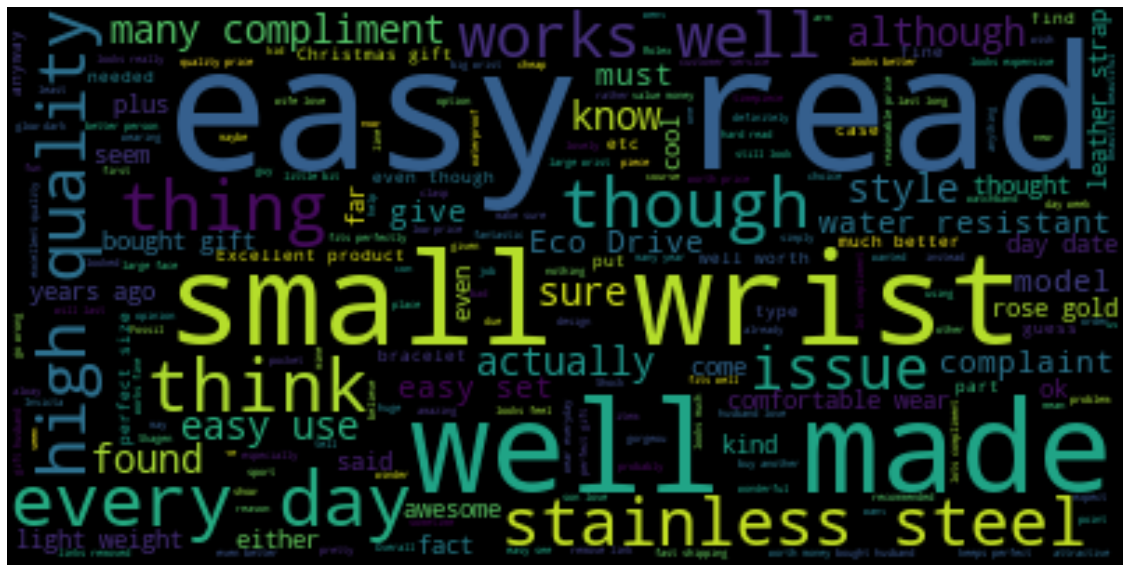

In [77]:
class_c_review_wordcloud(df, 1)

### Word Cloud for Negative Reviews


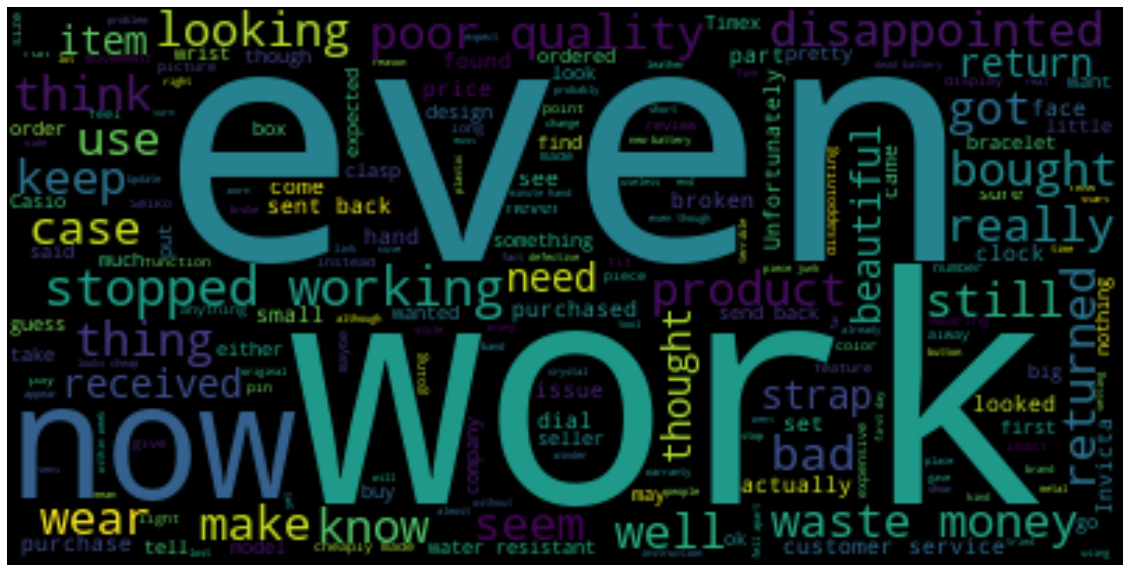

In [78]:
class_c_review_wordcloud(df, 0)


[Back to Top ↑](#top)

<a id='recommendations'></a>
### Recommendations & Next Steps

Through our analysis we've established the starting point for a framework by which the text of an Amazon review text can be used to predict the star rating associated with that review. Significant work remains in terms of improving the generalizability of these predictions so that they perform with a high degree of accuracy on new data outside of the training set. 

To accomplish this, we will continue to tune our models to find the optimal parameters and also seek to test additional models such as XGBoost, SVC, and Kernel Approximation. Given the promise shown by our Count Vectorization experiments, continuing to explore that method and other NLP techniques should be helpful in continuing to improve the performance of our models.

Further, we will seek to work with additional categories of data, and also explore the possibility of predicting only whether a review is "good" (4 or 5 stars) or "bad" (1 or 2 stars), which may be just as valuable or more valuable to a business as knowing the precise star rating.

Our eventual goal is that our process can be deployed on customer conversations anywhere, in any form, allowing businesses to proceed up with the appropriate automated customer service response (either internal to the business or directly to the customer), based on the class of the message and perhaps other contextual data that may provide further clues and insights.



[Back to Top ↑](#top)